In [21]:
#DECLARAÇÃO DE BIBLIOTECAS

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report
import seaborn as sns
from sklearn.datasets import make_classification
from scipy.special import erfc
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.preprocessing import label_binarize

In [6]:
#GERAÇÃO DE DADOS

# generate 2 class dataset
x, y = make_classification(n_samples=10000, n_classes=2, weights=[0.9,0.5],
random_state=42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8)


In [18]:
#KNN #GRID SEARCH

from sklearn.model_selection import GridSearchCV
parameters = {'weights':('uniform', 'distance'), 'n_neighbors':[1, 2, 3, 4, 5, 10, 15, 20]}
clf = GridSearchCV(KNeighborsClassifier(), parameters, cv=5, verbose=3, n_jobs=-1)
clf.fit(x_train, y_train)
clf.best_params_
clf.best_score_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    3.7s finished


0.8859999999999999

In [17]:
#NAIVE BAYES GAUSS

gauss = GaussianNB()

gauss.fit(x_train, y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [16]:
#REGRESSÃO LOGÍSTICA

# Instantiate LogisticRegression object for multi-class case.
model = LogisticRegression(solver='lbfgs', max_iter=10000)

model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

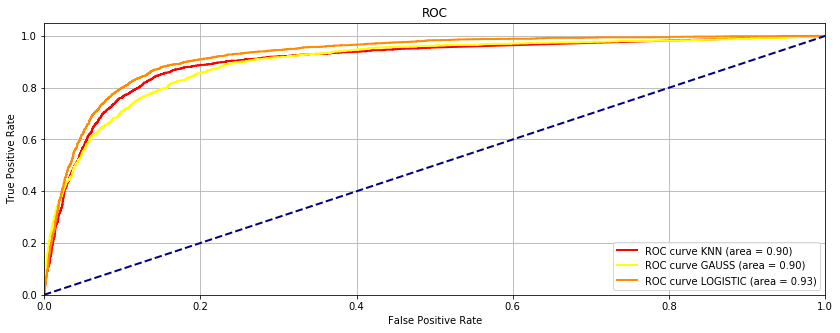

In [26]:
#PLOT DE CURVA ROC

# Getting the probabilities for each classifier.
y_prob_knn = clf.predict_proba(x_test)
y_prob_gauss = gauss.predict_proba(x_test)
y_prob_logistic = model.predict_proba(x_test)

# Binarize the test targets.
y_test_bin = label_binarize(y_test, classes=[0, 1])

# Compute ROC curve and ROC area for each class.
fpr_knn = dict()
tpr_knn = dict()
fpr_gauss = dict()
tpr_gauss = dict()
fpr_logistic = dict()
tpr_logistic = dict()

roc_auc_knn = dict()
roc_auc_gauss = dict()
roc_auc_logistic = dict()

plt.figure(figsize=(14, 5))
lw = 2

# Calculating ROC curve and ROC AUC.
fpr_knn, tpr_knn, tresh = roc_curve(y_test_bin, y_prob_knn[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_gauss, tpr_gauss, tresh = roc_curve(y_test_bin, y_prob_gauss[:, 1])
roc_auc_gauss = auc(fpr_gauss, tpr_gauss)

fpr_logistic, tpr_logistic, tresh = roc_curve(y_test_bin, y_prob_logistic[:, 1])
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

plt.plot(fpr_knn, tpr_knn, color='red', lw=lw, label='ROC curve KNN (area = %0.2f)' % roc_auc_knn)
plt.plot(fpr_gauss, tpr_gauss, color='yellow', lw=lw, label='ROC curve GAUSS (area = %0.2f)' % roc_auc_gauss)
plt.plot(fpr_logistic, tpr_logistic, color='darkorange', lw=lw, label='ROC curve LOGISTIC (area = %0.2f)' % roc_auc_logistic)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.grid()
plt.legend(loc="lower right")

plt.show()

In [ ]:
#COM BASE NA CURVA ROC, O CLASSIFICADOR DE REGRESSÃO LOGÍSTICA POSSUI MELHOR DESEMPENHO PARA ESSE CONJUNTO DE DADOS